<a href="https://colab.research.google.com/github/lucascardosossa/DataScience-kNN-Grp30/blob/main/Projeto_kNN_Unidade_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação** das LIBS

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# **1.Definição e Preparação do Problema**

In [ ]:
#Montando o drive do google para importar o dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Carregando Dataset do Instagram
dataset = pd.read_csv('/content/drive/MyDrive/Residencia/top_insta_influencers_data.csv')
dataset.head()

analise_insta = pd.DataFrame(dataset)
# Capturando os valores distintos da coluna 'country'
distinct_countries = analise_insta['country'].unique()

# Exibindo os valores distintos dos paises para criar o dicionario de mapeamento
print(distinct_countries)

['Spain' 'United States' nan 'Canada' 'Brazil' 'Netherlands'
 'United Kingdom' 'India' 'Uruguay' 'Turkey' 'Indonesia' 'Colombia'
 'France' 'Australia' 'Italy' 'United Arab Emirates' 'Puerto Rico'
 "CÃ´te d'Ivoire" 'Anguilla' 'Switzerland' 'Sweden'
 'British Virgin Islands' 'Czech Republic' 'Mexico' 'Germany' 'Russia']


##1.1 Manipulando Conjunto de Dados



In [3]:
#Dicionario de ranges para algoritmo de transformação Continentes - Paises
continent_ranges = {
    'South America': range(1, 10),  # 1-9
    'North America': range(20, 30),  # 20-29
    'Europe': range(40, 50),        # 40-49
    'Africa': range(60, 70),        # 60-69
    'Asia': range(80, 90),          # 80-89
    'Oceania': range(100, 110)      # 100-109
}

# Dicionário para mapear países a seus continentes
continent_mapping = {
    'Spain': 'Europe',
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Netherlands': 'Europe',
    'United Kingdom': 'Europe',
    'India': 'Asia',
    'Uruguay': 'South America',
    'Turkey': 'Asia',
    'Indonesia': 'Asia',
    'Colombia': 'South America',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Italy': 'Europe',
    'United Arab Emirates': 'Asia',
    'Puerto Rico': 'North America',
    "Côte d'Ivoire": 'Africa',
    'Anguilla': 'North America',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'British Virgin Islands': 'North America',
    'Czech Republic': 'Europe',
    'Mexico': 'North America',
    'Germany': 'Europe',
    'Russia': 'Europe'
}

In [4]:
# Função para transformar países em ranges dos continentes
def country_to_range(country):
    continent = continent_mapping.get(country)
    if continent:
        range_values = iter(continent_ranges[continent])
        return next(range_values)  # Pega o próximo valor da faixa
    return None  # Se o país não for encontrado

# Aplicando a transformação de range continentes
analise_insta['numeric_range2'] = analise_insta['country'].apply(country_to_range)

# Função para converter valores em decimais para realizar as análises
def convert_postagens(value):
  if 'm' in value:
    return float(value.replace('m', '')) * 100000
  elif 'k' in value:
    return float(value.replace('k', '')) * 1000
  elif 'b' in value:
    return float(value.replace('b', '')) * 1000000000
  else:
    return float(value)

#Aplicando o metodo de converver

analise_insta['posts'] = dataset['posts'].apply(convert_postagens)
analise_insta['followers'] = dataset['followers'].apply(convert_postagens)
analise_insta['avg_likes'] = dataset['avg_likes'].apply(convert_postagens)
analise_insta['new_post_avg_like'] = dataset['new_post_avg_like'].apply(convert_postagens)
analise_insta['total_likes'] = dataset['total_likes'].apply(convert_postagens)

analise_insta['60_day_eng_rate'] = dataset['60_day_eng_rate'].replace('%', '', regex=True)
analise_insta['60_day_eng_rate'] = analise_insta['60_day_eng_rate'].astype(float)/100

# Exibindo o DataFrame resultante
print(analise_insta)

     rank channel_info  influence_score   posts   followers  avg_likes  \
0       1    cristiano               92  3300.0  47580000.0   870000.0   
1       2  kyliejenner               91  6900.0  36620000.0   830000.0   
2       3     leomessi               90   890.0  35730000.0   680000.0   
3       4  selenagomez               93  1800.0  34270000.0   620000.0   
4       5      therock               91  6800.0  33410000.0   190000.0   
..    ...          ...              ...     ...         ...        ...   
195   196    iambeckyg               71  2300.0   3320000.0   623800.0   
196   197   nancyajram               81  3800.0   3320000.0   390400.0   
197   198  luansantana               79   770.0   3320000.0   193300.0   
198   199    nickjonas               78  2300.0   3300000.0   719600.0   
199   200    raisa6690               80  4200.0   3280000.0   232200.0   

     60_day_eng_rate  new_post_avg_like   total_likes        country  \
0             0.0139           650000.0

##1.2 Análise Exploratória

Média: 7740950.0
Mediana de Curtidas: 5005000.0
Correlação entre Seguidores e Curtidas: 0.06744941434555797


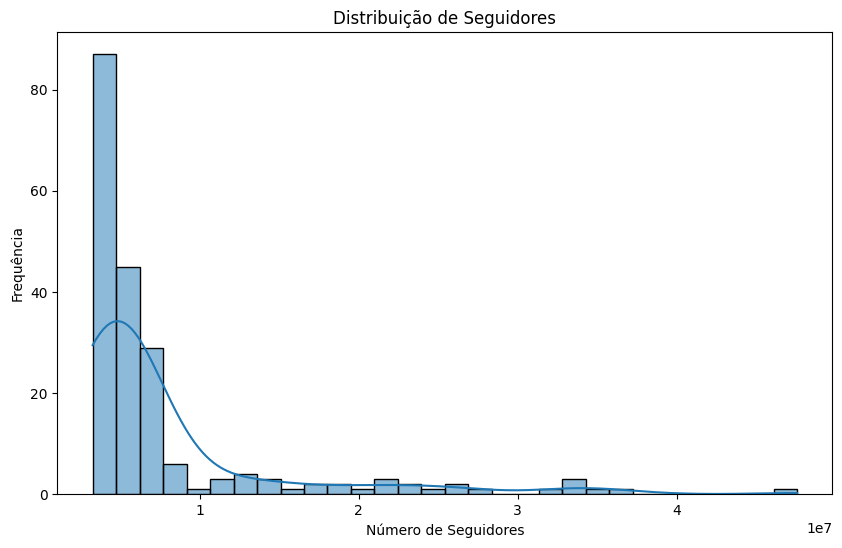

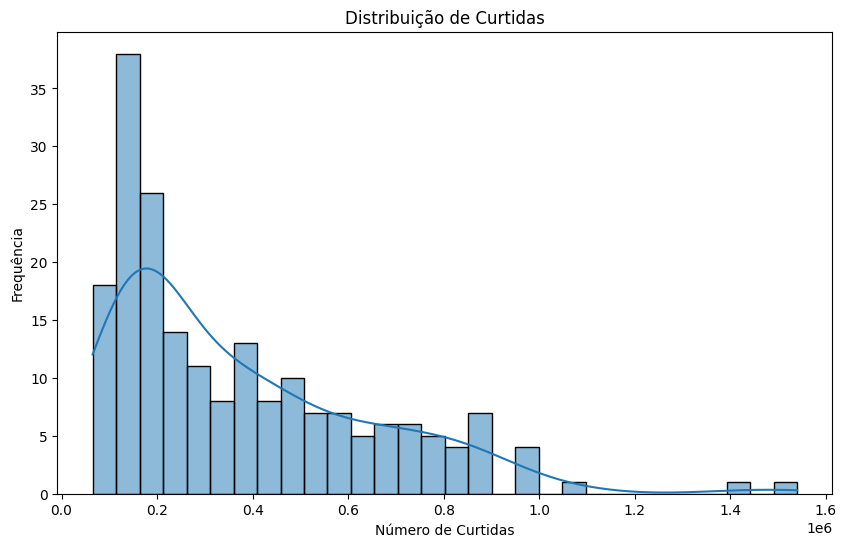

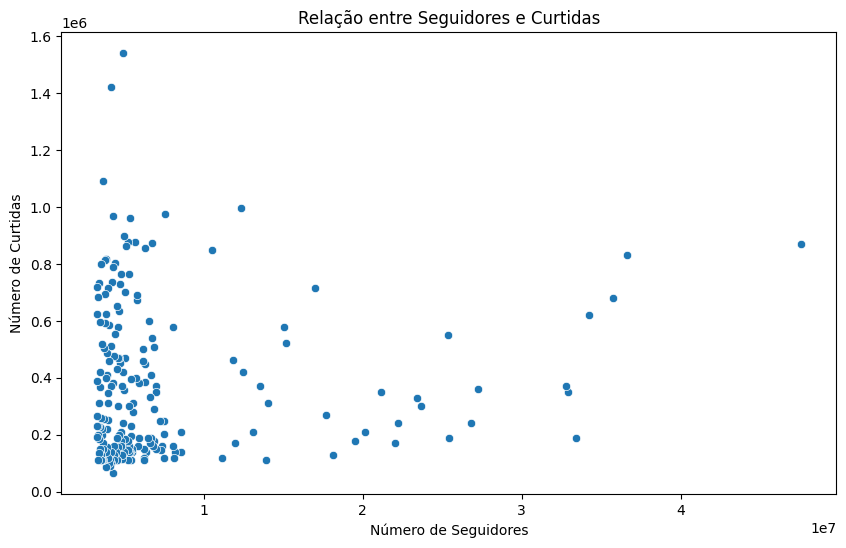

In [5]:
# Visualização de média e medianas
media = analise_insta['followers'].mean()
mediana = analise_insta['followers'].median()
print(f'Média: {media}')
print(f'Mediana de Curtidas: {mediana}')

#Correlação entre curtidas e seguidores
correlation = analise_insta['followers'].corr(analise_insta['avg_likes'])
print(f'Correlação entre Seguidores e Curtidas: {correlation}')

# Histograma de seguidores
plt.figure(figsize=(10, 6))
sns.histplot(analise_insta['followers'], bins=30, kde=True)
plt.title('Distribuição de Seguidores')
plt.xlabel('Número de Seguidores')
plt.ylabel('Frequência')
plt.show()

# Histograma de curtidas
plt.figure(figsize=(10, 6))
sns.histplot(analise_insta['avg_likes'], bins=30, kde=True)
plt.title('Distribuição de Curtidas')
plt.xlabel('Número de Curtidas')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='avg_likes', data=analise_insta)
plt.title('Relação entre Seguidores e Curtidas')
plt.xlabel('Número de Seguidores')
plt.ylabel('Número de Curtidas')
plt.show()

#2. Implementação do Algoritmo kNN


Relatório de Classificação:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
        20.0       0.60      0.50      0.55        18
        40.0       0.00      0.00      0.00         3
        80.0       0.00      0.00      0.00         2

    accuracy                           0.32        28
   macro avg       0.15      0.12      0.14        28
weighted avg       0.39      0.32      0.35        28

Acurácia do Modelo: 0.32142857142857145


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

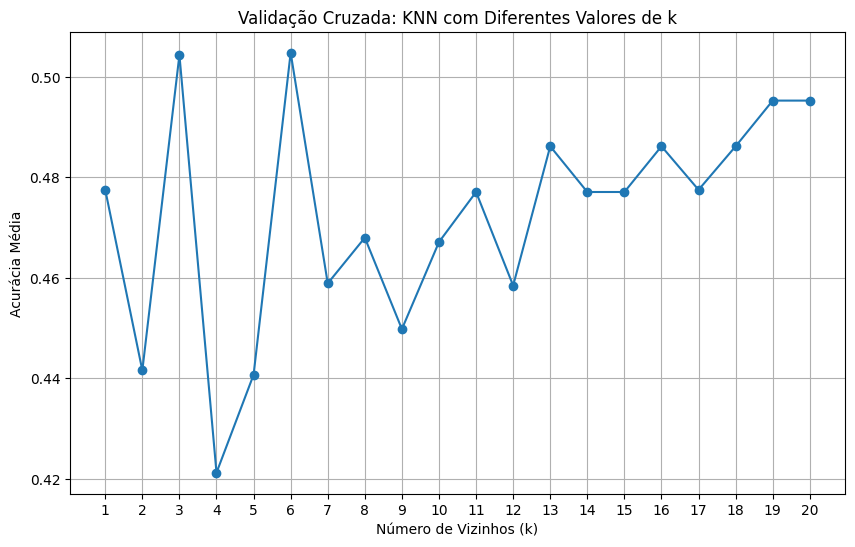

In [36]:
#removendo Nan
analise_sem_Nan = analise_insta.dropna(subset=['country'])
#removendo Nan
analise_sem_Nan = analise_insta.dropna(subset=['numeric_range2'])

X = analise_sem_Nan[['followers', 'posts', 'avg_likes']]  # Características
y = analise_sem_Nan['numeric_range2']  # Variável alvo
#y = analise_sem_Nan['country']  # Variável alvo

# Dividindo o DataFrame em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializando o modelo kNN
k = 3  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("Acurácia do Modelo:", accuracy_score(y_test, y_pred))



# Lista para armazenar as médias das pontuações
mean_scores = []
k_values = range(1, 21)  # Testando valores de k de 1 a 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())  # Armazenando a média das pontuações

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('Validação Cruzada: KNN com Diferentes Valores de k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.xticks(k_values)
plt.grid()
plt.show()

#3. Otimização e Ajustes

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Melhores parâmetros:  {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}


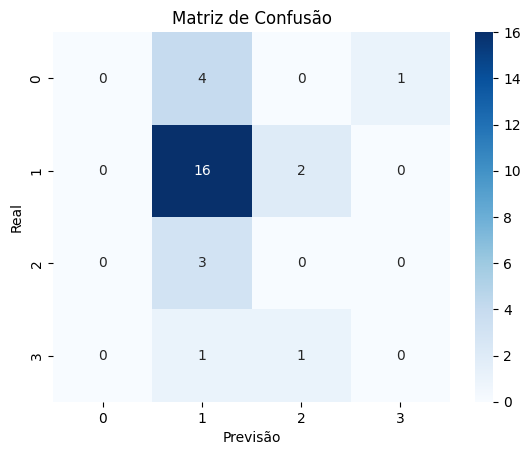

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
        20.0       0.67      0.89      0.76        18
        40.0       0.00      0.00      0.00         3
        80.0       0.00      0.00      0.00         2

    accuracy                           0.57        28
   macro avg       0.17      0.22      0.19        28
weighted avg       0.43      0.57      0.49        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
#removendo Nan
analise_sem_Nan = analise_insta.dropna(subset=['numeric_range2'])

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros: ", grid_search.best_params_)

best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print(classification_report(y_test, y_pred))

#4. Análise e Visualização dos Resultados

MAE: 12.6786
MSE: 531.6071
RMSE: 23.0566


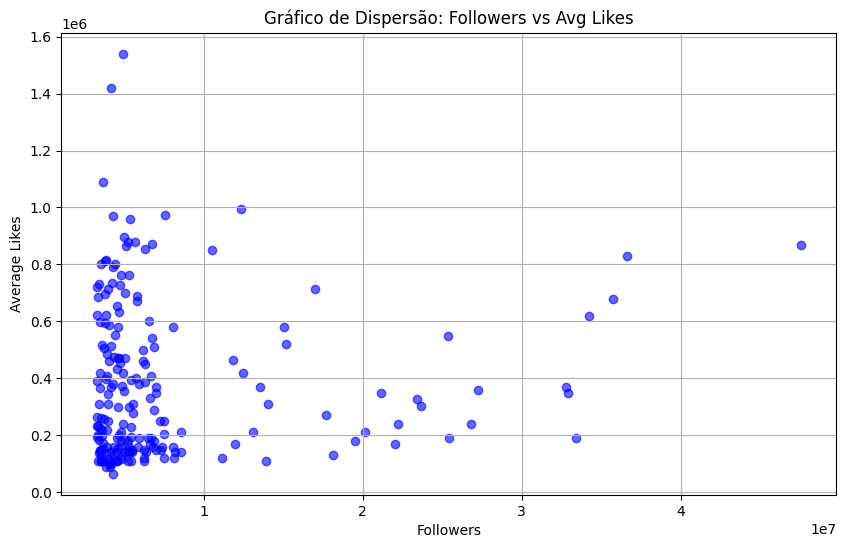

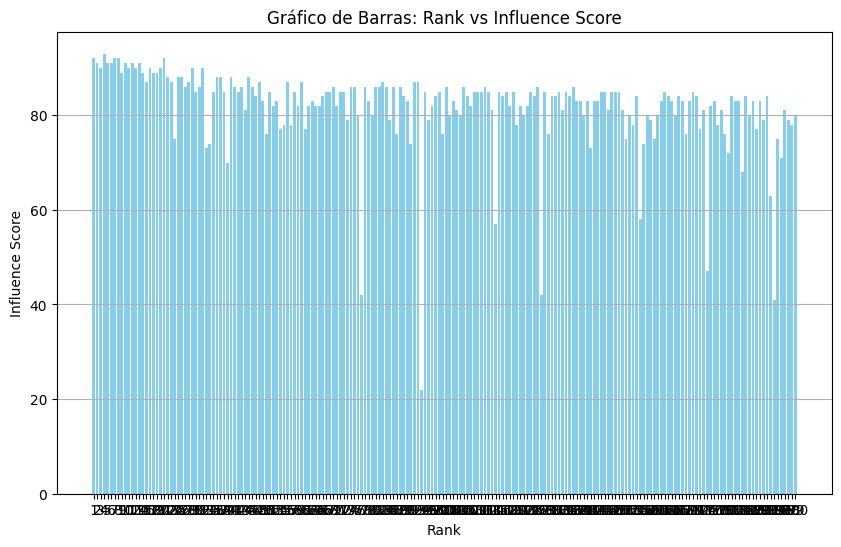

In [43]:
#print(y_pred)
# Cálculo das métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibição dos resultados
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


# Gráfico de dispersão Followers vs Avg Likes
plt.figure(figsize=(10, 6))
plt.scatter(analise_insta['followers'], analise_insta['avg_likes'], color='blue', alpha=0.6)
plt.title('Gráfico de Dispersão: Followers vs Avg Likes')
plt.xlabel('Followers')
plt.ylabel('Average Likes')
plt.grid(True)
plt.show()

# Gráfico de barras Rank vs Influence Score
plt.figure(figsize=(10, 6))
plt.bar(analise_insta['rank'], analise_insta['influence_score'], color='skyblue')
plt.title('Gráfico de Barras: Rank vs Influence Score')
plt.xlabel('Rank')
plt.ylabel('Influence Score')
plt.xticks(analise_insta['rank'])  # Define os ticks do eixo x
plt.grid(axis='y')
plt.show()